In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
mobileprice = pd.read_csv("data/mobileprice.csv",sep=',')
mobileprice

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [ ]:
# ANALISI

In [3]:
print(f'Number of istances: {mobileprice.shape[0]}')

Number of istances: 2000


In [4]:
print(f'Is there any missing values: {mobileprice.isna().any().any()}')

Is there any missing values: False


1    500
2    500
3    500
0    500
Name: price_range, dtype: int64


<Axes: xlabel='price_range', ylabel='count'>

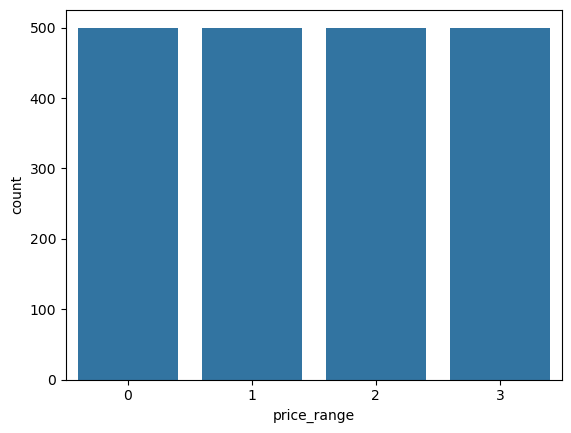

In [5]:
print(mobileprice["price_range"].value_counts())
sns.countplot(mobileprice, x = "price_range")

In [ ]:
"""2. La variabile sc_w assume valori discreti o continui? """

Come vediamo dal grafico la variabile sc_w assume discreti


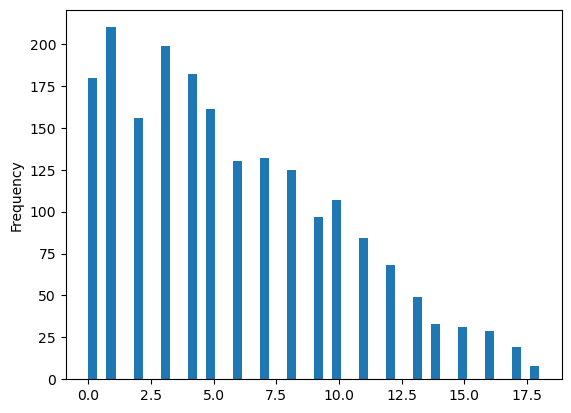

In [32]:
mobileprice["sc_w"].plot.hist(bins=50)
print("Come vediamo dal grafico la variabile sc_w assume discreti")

In [ ]:
"""Analizzare la distribuzione dei valori e
verificare se i telefoni costosi hanno mediamente una dimensione superiore di schermo."""

<Axes: xlabel='sc_w'>

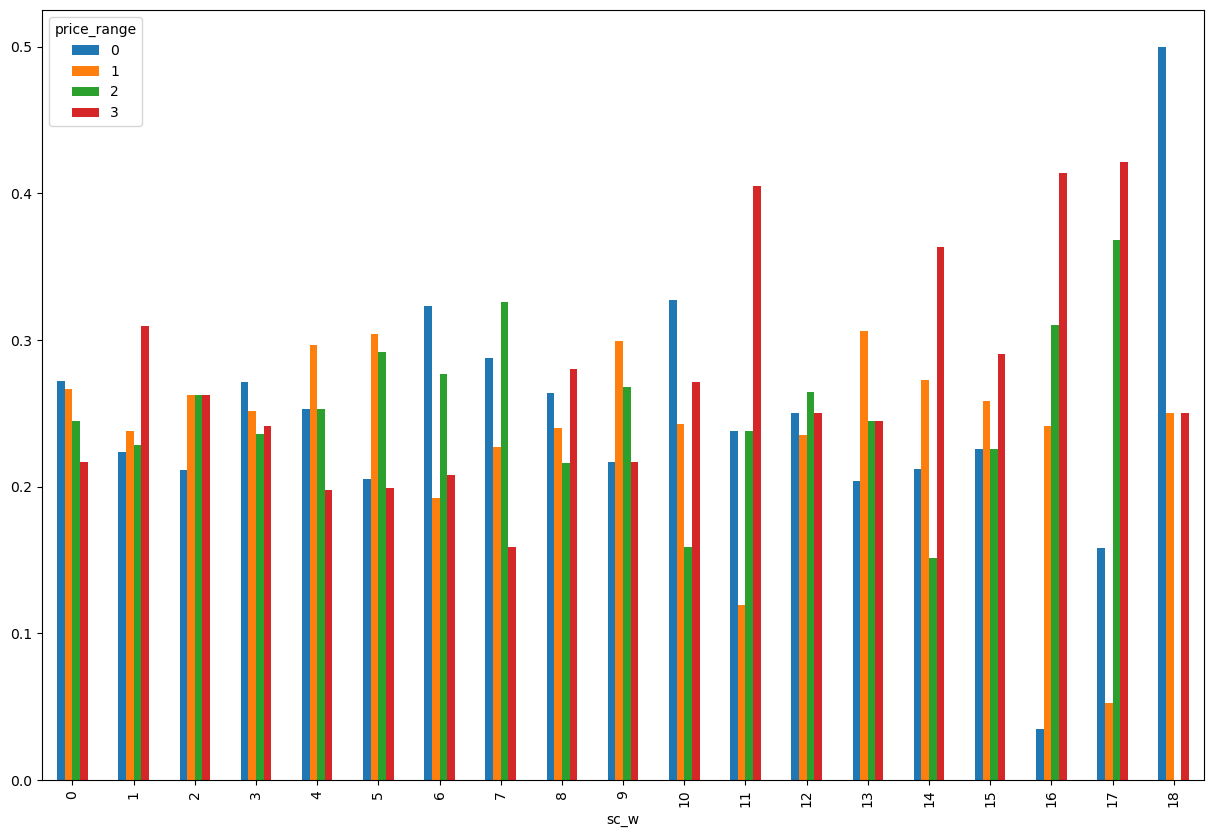

In [33]:
(mobileprice.groupby(['sc_w','price_range']).size()/mobileprice.groupby(['sc_w']).size()).unstack().plot.bar(figsize= (15,10))
print("Come possiamo ")

In [48]:
mobileprice.groupby(["price_range"]).mean()["sc_w"]

price_range
0    5.682
1    5.544
2    5.714
3    6.128
Name: sc_w, dtype: float64

Non ci sono grandi differenza in media tra le vendite


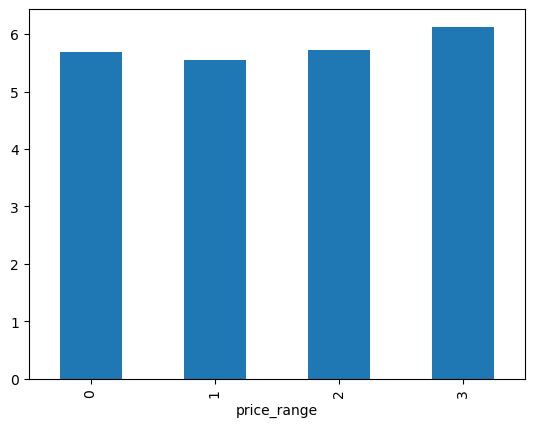

In [49]:
mobileprice.groupby(["price_range"]).mean()["sc_w"].plot.bar()
print("Non ci sono grandi differenza in media tra le vendite")

In [ ]:
"""Verificare se eliminando gli elementi con sc_w uguale a 0 il risultato cambia."""

In [54]:
mobileprice[mobileprice["sc_w"] > 0].groupby(["price_range"]).mean()['sc_w']

price_range
0    6.299335
1    6.132743
2    6.265351
3    6.646421
Name: sc_w, dtype: float64

I valori sono cambiati leggermente, ma la modifica non ha portato a cambi drastici


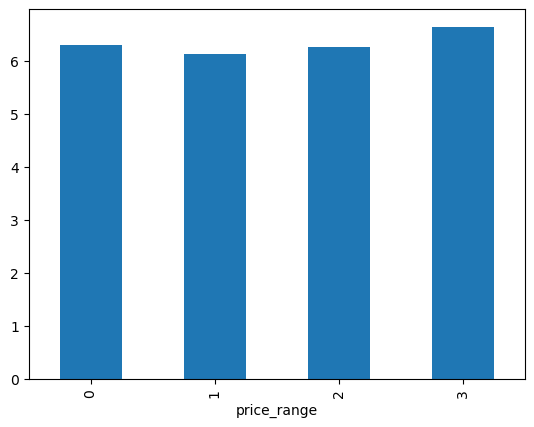

In [56]:
mobileprice[mobileprice["sc_w"] > 0].groupby(["price_range"])["sc_w"].mean().plot.bar()
print("I valori sono cambiati leggermente, ma la modifica non ha portato a cambi drastici")

In [ ]:
"""3. E’ vero che mediamente i telefoni meno costosi hanno anche una batteria meno potente?
Realizzare 4 istogrammi (uno per ogni valore di price_range) che rappresentino la distribuzione
dei valori di battery power per ogni categoria."""


<Axes: xlabel='price_range'>

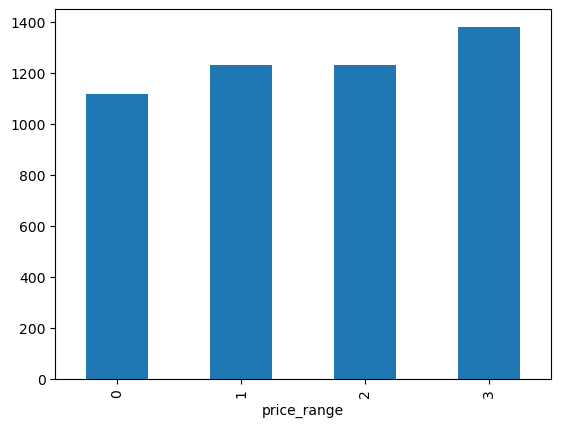

In [57]:
mobileprice.groupby(['price_range']).mean()['battery_power'].plot(kind='bar')

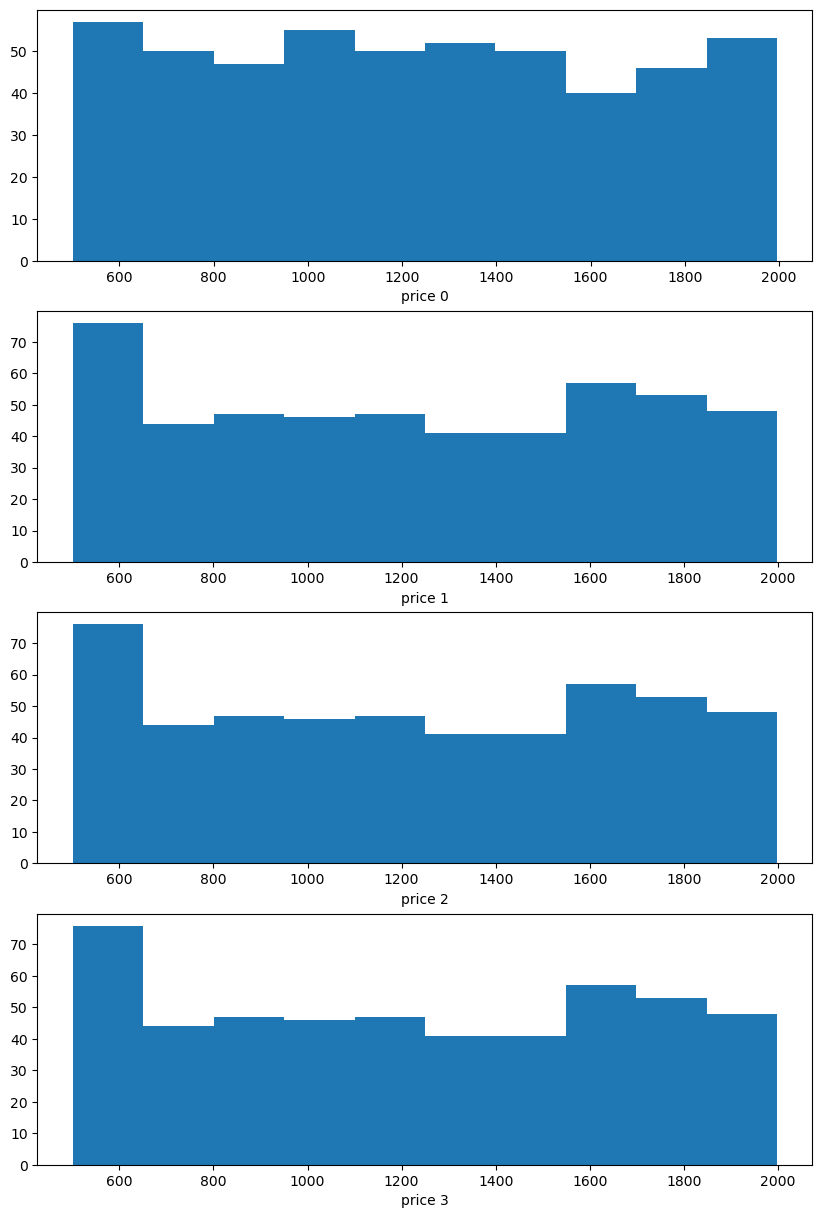

In [58]:
battery_by_prices = []
for i in mobileprice.price_range.values:
  battery_by_prices.append(mobileprice[mobileprice.price_range == i].battery_power)

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10,15)) #due axes, uno per ogni grafico
for i in range(4):
  axes[i].hist(battery_by_prices[i])
  axes[i].set_xlabel('price {}'.format(i) )

In [59]:
"""4. Verificare se tutti i telefoni che hanno il 4G hanno anche il 3G (punti 2)"""
df_4g = mobileprice[mobileprice['four_g'] == 1]
print("numero telefoni con 4G:", df_4g.shape[0])
print("numero telefoni con 4G e 3G:", df_4g[df_4g['three_g']==1].shape[0])

numero telefoni con 4G: 1043
numero telefoni con 4G e 3G: 1043


In [18]:
"""5. Quanti sono i telefoni 4G che non hanno wifi e bluetooth? (punti 2)"""

mobileprice[(mobileprice["four_g"] == 1) & (mobileprice["wifi"] == 0) & (mobileprice["blue"] == 0)].shape[0]

263

In [ ]:
"""1. Si vuole predire il valore di price_range sulla base degli attributi presenti nel dataset.
Dividere il dataset in modo che 3/4 degli elementi siano contenuti in un nuovo dataset “train” e
1/4 nel dataset “test”.
Allenare il train con il modello Decision Tree e valutare l’accuracy ottenuta calcolata sia sul
dataset train sia sul dataset test. Confrontare i risultati ottenuti con quelli ottenuti con una
predizione basata sul modello Logistic Regression. Effettuare alcune considerazioni sui risultati
ottenuti, tenendo in considerazione anche l’analisi della confusion matrix. (punti 4)"""

In [60]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [61]:
mobileprice = pd.read_csv("data/mobileprice.csv",sep=',')
mobileprice

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [62]:
y = mobileprice['price_range']
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [64]:
X = mobileprice.loc[:,'battery_power':'wifi']
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=1/4)

Accuracy with decision tree:
accuracy on train: 1.0
accuracy on test: 0.814


<Axes: >

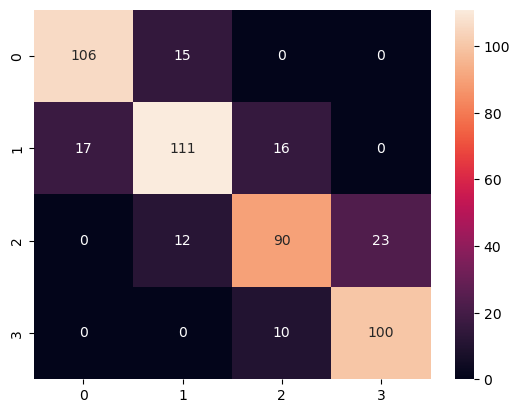

In [66]:
# Decision tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

result = dt.predict(X_test)
print("Accuracy with decision tree:")
print(f'accuracy on train: {accuracy_score(y_train, dt.predict(X_train))}')
print(f'accuracy on test: {accuracy_score(y_test,result)}')

confusionmatrix = confusion_matrix(y_test,result)
sns.heatmap(confusionmatrix,annot=True,fmt="d")

Accuracy with logistic regression:
accuracy on train: 0.646
accuracy on test: 0.632


/usr/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

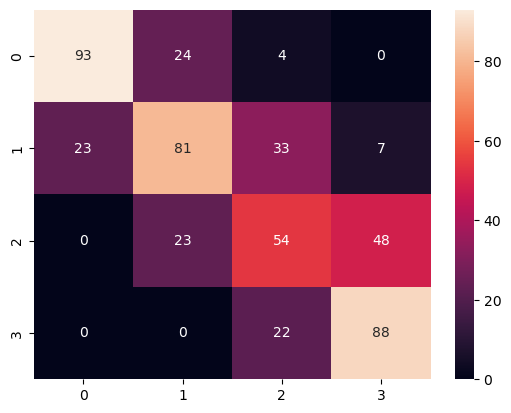

In [67]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

result = lr.predict(X_test)
print("Accuracy with logistic regression:")
print(f'accuracy on train: {accuracy_score(y_train, lr.predict(X_train))}')
print(f'accuracy on test: {accuracy_score(y_test,result )}')

confusionmatrix = confusion_matrix(y_test,result)
sns.heatmap(confusionmatrix,annot=True,fmt="d")

In [ ]:
"""2. Confrontare l’accuratezza ottenuta nel punto precedente con l’accuratezza si ottiene con un
una 10 Fold cross validation. (punti 1)"""

In [68]:
from sklearn.model_selection import cross_val_score

In [69]:
dt = DecisionTreeClassifier()
lr = LogisticRegression()

print(f'Average accuracy on Decision Tree with 10 Fold cross validation: {cross_val_score(dt,X, y, cv=10).mean()}')
print(f'Average accuracy on Logistic Regression with 10 Fold cross validation: {cross_val_score(lr,X, y, cv=10).mean()}')

Average accuracy on Decision Tree with 10 Fold cross validation: 0.841


/usr/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimiz

Average accuracy on Logistic Regression with 10 Fold cross validation: 0.641


/usr/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimiz

In [ ]:
"""3. Utilizzare la funzione di gridSearchCV per trovare i parametri migliori del classificatore
decision tree. Agire sui parametri criterion, max_features e min_samples_split. Vericare se
l’accuratezza che si ottiene con la nuova configurazione supera quella standard ottenuta al
punto 1 (punti 4)"""

In [70]:
from sklearn.model_selection import GridSearchCV

In [74]:
dt = DecisionTreeClassifier()
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [1,2,3,4,5]
}

clf = GridSearchCV(dt, parameters, cv=10, n_jobs=-1, scoring= 'accuracy')
clf.fit(X_train, y_train)

/usr/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
140 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
62 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/lib/python3.12/site-packages/sklearn/utils/_param_validation.py", line 9

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [1, 2, 3, 4, 5]},
             scoring='accuracy')

In [78]:
clf.best_params_

{'criterion': 'entropy', 'max_features': 'log2', 'min_samples_split': 4}

In [82]:
dt = DecisionTreeClassifier(criterion=clf.best_params_['criterion'],
                            max_features=clf.best_params_['max_features'],
                            min_samples_split=clf.best_params_['min_samples_split'])

dt.fit(X_train, y_train)

print("Accuracy with decision tree:")
print(f'accuracy on train: {accuracy_score(y_train, dt.predict(X_train))}')
print(f'accuracy on test: {accuracy_score(y_test,dt.predict(X_test))}')



Accuracy with decision tree:
accuracy on train: 0.9773333333333334
accuracy on test: 0.678


In [ ]:
"""4. Utilizzare la funzione MaxAbsScaler per scalare i valori del dataset tra 0 e 1 e confrontare se
l’accuratezza ottenuta con il Decision Tree Classifier migliora (punti 3)."""

In [83]:
mobileprice = pd.read_csv("data/mobileprice.csv",sep=',')
mobileprice

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [86]:
y = mobileprice['price_range']
X = mobileprice.loc[:,'battery_power':'wifi']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=1/4)

In [90]:
max_abs_scaler = preprocessing.MaxAbsScaler()

X_train = pd.DataFrame(max_abs_scaler.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(max_abs_scaler.fit_transform(X_test),columns=X_test.columns)

In [91]:
dt = DecisionTreeClassifier(criterion=clf.best_params_['criterion'],
                            max_features=clf.best_params_['max_features'],
                            min_samples_split=clf.best_params_['min_samples_split'])

dt.fit(X_train, y_train)

print("Accuracy with decision tree:")
print(f'accuracy on train: {accuracy_score(y_train, dt.predict(X_train))}')
print(f'accuracy on test: {accuracy_score(y_test,dt.predict(X_test))}')


Accuracy with decision tree:
accuracy on train: 0.9633333333333334
accuracy on test: 0.652


In [ ]:
"""5. Discretizzare il valore di ram in 4 intervalli e verificare se l’accuratezza ottenuta con il
Decision Tree Classifier migliora (punti 2)."""


In [102]:
mobileprice_copy = mobileprice.copy()
mobileprice_copy

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [103]:
y = mobileprice_copy['price_range']
X = mobileprice_copy.loc[:,'battery_power':'wifi']

In [104]:
est = preprocessing.KBinsDiscretizer(n_bins=4, encode='ordinal')
X['ram'] = est.fit_transform(pd.DataFrame(X['ram']))
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2.0,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2.0,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2.0,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2.0,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1.0,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,0.0,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,1.0,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,2.0,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,0.0,18,10,19,1,1,1


In [105]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=1/4)

In [106]:
dt = DecisionTreeClassifier(criterion=clf.best_params_['criterion'],
                            max_features=clf.best_params_['max_features'],
                            min_samples_split=clf.best_params_['min_samples_split'])

dt.fit(X_train, y_train)

print("Accuracy with decision tree:")
print(f'accuracy on train: {accuracy_score(y_train, dt.predict(X_train))}')
print(f'accuracy on test: {accuracy_score(y_test,dt.predict(X_test))}')


Accuracy with decision tree:
accuracy on train: 0.94
accuracy on test: 0.498


In [97]:
print("L'accuratezza è peggiorata notevolmento dopo aver discretizzato la colonna ram")

L'accuratezza è peggiorata notevolmento dopo aver discretizzato la colonna ram


In [ ]:
"""6. Creare una pipeline in cui il valore di ram sia discretizzato in 4 intervalli, il valore di
battery_power sia discretizzato in 10 intervalli e poi il dataset venga ricondotto a valori
nell’intervallo (0,1) e normalizzato con la funzione Normalizer. Si applichi poi un modello
DecisionTree. (punti 4) [Alternativa (punti 2): non applicare la discretizzazione]"""

In [107]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import FeatureUnion, FunctionTransformer

In [108]:
mobileprice_copy = mobileprice.copy()
mobileprice_copy


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [109]:
y = mobileprice['price_range']
X = mobileprice.loc[:,'battery_power':'wifi']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=1/4)

In [110]:
discretizer = ColumnTransformer([('ram',preprocessing.KBinsDiscretizer(n_bins=4, encode="ordinal", strategy="uniform"), ["ram"]),
                                 ("battery_power", preprocessing.KBinsDiscretizer(n_bins=10, encode="ordinal", strategy="uniform"), ["battery_power"])])

model_pipeline = DecisionTreeClassifier()
preprocessing_transformer = Pipeline(steps=[('scaler', preprocessing.MinMaxScaler(feature_range=(0, 1))),
                                            ('normalizer', preprocessing.Normalizer()),
                                             ])

my_pipeline = Pipeline(steps=[('discretize',discretizer),
                              ('preprocessing',preprocessing_transformer),
                              ('model',model_pipeline)])

my_pipeline

Pipeline(steps=[('discretize',
                 ColumnTransformer(transformers=[('ram',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   n_bins=4,
                                                                   strategy='uniform'),
                                                  ['ram']),
                                                 ('battery_power',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   n_bins=10,
                                                                   strategy='uniform'),
                                                  ['battery_power'])])),
                ('preprocessing',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('normalizer', Normalizer())])),
                ('model', DecisionTreeClassifier())])

In [111]:
my_pipeline.fit(X_train, y_train)

preds = my_pipeline.predict(X_test)
 
accuracy_score(y_test, preds)

0.644